In [1]:
import os
import re
import random
import numpy as np
from keras.models import Sequential

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory (
    'CarneDataset/train',
    validation_split=0.2,
    subset='training',
    seed=1,
    image_size=(300,300)
                                                      )

Found 1633 files belonging to 8 classes.
Using 1307 files for training.


In [3]:
class_names = train_ds.class_names
print(class_names)

['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


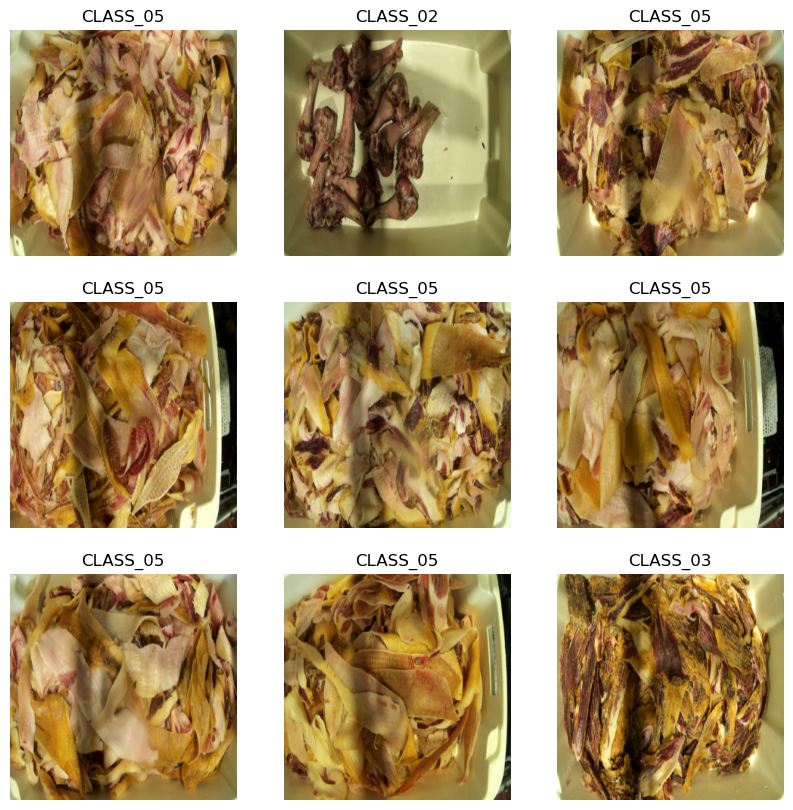

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
num_classes = len(class_names)

model = tf.keras. Sequential ([
tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)), tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'), tf.keras.layers. MaxPooling2D(),
tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), tf.keras.layers.MaxPooling2D(),
tf.keras. layers.Conv2D(64, 3, padding='same', activation='relu'), tf.keras.layers.MaxPooling2D (),
tf.keras.layers.Flatten(), tf.keras.layers. Dropout(0.2), tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.Dense(num_classes)
])

In [6]:
model.compile(optimizer='adam',
loss=tf.keras. losses. SparseCategoricalCrossentropy (from_logits=True), metrics=['accuracy'])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [8]:
epocha=20
history = model.fit(
train_ds,
epochs=epocha
)

Epoch 1/20
41/41 [==============================] - 63s 1s/step - loss: 1.4488 - accuracy: 0.5601
Epoch 2/20
41/41 [==============================] - 60s 1s/step - loss: 0.7719 - accuracy: 0.7238
Epoch 3/20
41/41 [==============================] - 65s 2s/step - loss: 0.4366 - accuracy: 0.8477
Epoch 4/20
41/41 [==============================] - 65s 2s/step - loss: 0.2843 - accuracy: 0.9021
Epoch 5/20
41/41 [==============================] - 66s 2s/step - loss: 0.1268 - accuracy: 0.9594
Epoch 6/20
41/41 [==============================] - 63s 2s/step - loss: 0.0525 - accuracy: 0.9878
Epoch 7/20
41/41 [==============================] - 68s 2s/step - loss: 0.0251 - accuracy: 0.9939
Epoch 8/20
41/41 [==============================] - 65s 2s/step - loss: 0.1484 - accuracy: 0.9602
Epoch 9/20
41/41 [==============================] - 66s 2s/step - loss: 0.0959 - accuracy: 0.9686
Epoch 10/20
41/41 [==============================] - 67s 2s/step - loss: 0.0208 - accuracy: 0.9954
Epoch 11/20
41/41 [

In [9]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    'CarneDataset/test',
    seed=123,
    image_size= (300,300)
)

Found 810 files belonging to 8 classes.


In [10]:
model.evaluate(test_ds,return_dict=True)

26/26 [==============================] - 13s 484ms/step - loss: 0.5563 - accuracy: 0.8877


{'loss': 0.5562924742698669, 'accuracy': 0.8876543045043945}

In [11]:
image_path = r'C:\Users\jespinoza\Documents\GitHub\ProjectFinaljespinoza\CarneDataset\ImagenNew.png'
image = tf.keras.preprocessing.image.load_img(image_path).resize((300,300))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)


1/1 [==============================] - 0s 174ms/step


In [13]:
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Esta imagen parece ser CLASS_07 con un 99.99 % de exactitud.


In [16]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics 

from mlxtend.plotting import plot_confusion_matrix 
from keras.models import load_model 
from keras.preprocessing. image import ImageDataGenerator 

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [15]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 3.2 MB/s eta 0:00:00


In [19]:
width_shape = 300
height_shape = 300

names = ['CLASS_01','CLASS_02','CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']

test_data_dir = r'\Users\jespinoza\Documents\GitHub\ProjectFinaljespinoza\CarneDataset\test'
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory (
    test_data_dir,
    target_size=(width_shape, height_shape),
    class_mode='categorical',
    shuffle=False
)

custom_Model = load_model('my_modelo')

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix (
    conf_mat=matc,
    figsize=(8,8),
    class_names=names,
    show_normed=False
)

plt.tight_layout( )

print (metrics.classification_report(y_real,y_pred, digits = 4))

Found 810 images belonging to 8 classes.


OSError: No file or directory found at my_modelo

In [20]:
!pip install keras.model

ERROR: Could not find a version that satisfies the requirement keras.model (from versions: none)
ERROR: No matching distribution found for keras.model
